<a href="https://colab.research.google.com/github/HarshitCodex/DL-ML_Projects/blob/master/MNIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [0]:
!pip install fastai==1.0


  Using cached https://files.pythonhosted.org/packages/b8/71/728f5c5232472081c4829cfc8b88a5d5359d23ffa087523288f780ab5fc7/fastai-1.0.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/69/60/f685fb2cfb3088736bafbc9bdbb455327bdc8906b606da9c9a81bae1c81e/torch-1.1.0-cp36-cp36m-manylinux1_x86_64.whl
  Found existing installation: fastai 0.7.0
    Uninstalling fastai-0.7.0:
      Successfully uninstalled fastai-0.7.0
  Found existing installation: torch 0.3.1
    Uninstalling torch-0.3.1:
      Successfully uninstalled torch-0.3.1


In [0]:
from fastai.imports import *
from fastai.torch_imports import *
from fastai.io import *

RuntimeError: ignored

In [0]:
path='data/mnist/'

In [0]:
import os
os.makedirs(path,exist_ok=True)

In [0]:
URL='http://deeplearning.net/data/mnist/'
FILENAME='mnist.pkl.gz'

def load_mnist(filename):
    return pickle.load(gzip.open(filename, 'rb'), encoding='latin-1')

In [0]:
get_data(URL+FILENAME,path+FILENAME)
((x,y),(x_valid,y_valid),_)=load_mnist(path+FILENAME)

NameError: ignored

In [0]:
??get_data

In [0]:
type(x),x.shape,type(y),y.shape

(numpy.ndarray, (50000, 784), numpy.ndarray, (50000,))

In [0]:
mean=x.mean()
std=x.std()
x=(x-mean)/std
mean,std,x.mean(),x.std()

(0.13044983, 0.3072898, -3.1638146e-07, 0.99999934)

In [0]:
x_valid=(x_valid-mean)/std
x_valid.mean(),x_valid.std()

(-0.005850922, 0.99243325)

In [0]:
def show(img,title=None):
  plt.imshow(img,cmap="gray")
  if title is not None:plt.title(title)

In [0]:
??set_title

Object `set_title` not found.


In [0]:
def plots(ims,figsize=(12,6),rows=2,titles=None):
  f=plt.figure(figsize=figsize)
  cols=len(ims)
  for i in range(cols):
    sp=f.add_subplot(rows,cols,i+1)
    sp.axis('Off')
    if titles is not None:sp.set_title(titles[i],fontsize=16)
    plt.imshow(ims[i],cmap='gray')

In [0]:
x_valid.shape

(10000, 784)

In [0]:
x_imgs=np.reshape(x_valid,(-1,28,28));x_imgs.shape

(10000, 28, 28)

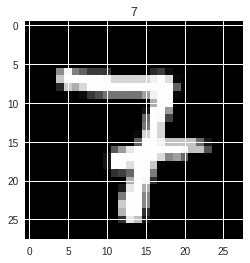

In [0]:
show(x_imgs[100],y_valid[100])

In [0]:
y_valid.shape

(10000,)

In [0]:
y_valid[100]

7

In [0]:
x_imgs[1,:28,:28]

array([[-0.42452, -0.42452, -0.42452, -0.42452, -0.42452, -0.42452, -0.42452, -0.42452, -0.42452, -0.42452,
        -0.42452, -0.42452, -0.42452, -0.42452, -0.42452, -0.42452, -0.42452, -0.42452, -0.42452, -0.42452,
        -0.42452, -0.42452, -0.42452, -0.42452, -0.42452, -0.42452, -0.42452, -0.42452],
       [-0.42452, -0.42452, -0.42452, -0.42452, -0.42452, -0.42452, -0.42452, -0.42452, -0.42452, -0.42452,
        -0.42452, -0.42452, -0.42452, -0.42452, -0.42452, -0.42452, -0.42452, -0.42452, -0.42452, -0.42452,
        -0.42452, -0.42452, -0.42452, -0.42452, -0.42452, -0.42452, -0.42452, -0.42452],
       [-0.42452, -0.42452, -0.42452, -0.42452, -0.42452, -0.42452, -0.42452, -0.42452, -0.42452, -0.42452,
        -0.42452, -0.42452, -0.42452, -0.42452, -0.42452, -0.42452, -0.42452, -0.42452, -0.42452, -0.42452,
        -0.42452, -0.42452, -0.42452, -0.42452, -0.42452, -0.42452, -0.42452, -0.42452],
       [-0.42452, -0.42452, -0.42452, -0.42452, -0.42452, -0.42452, -0.42452, -0.4245

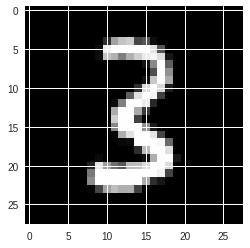

In [0]:
show(x_imgs[0,:28,:28])

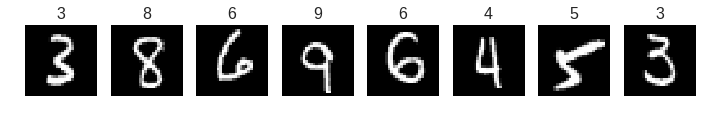

In [0]:
plots(x_imgs[:8],titles=y_valid[:8])

# **WORKING ON NEURAL NETS NOW**

In [0]:
from fastai.metrics import *
from fastai.model import *
from fastai.dataset import *

import torch.nn as nn

In [0]:
net = nn.Sequential(
nn.Linear(28*28,100),
nn.ReLU(),
nn.Linear(100,100),
nn.ReLU(),
nn.Linear(100,25),
nn.ReLU(),
nn.Linear(25,10),
nn.LogSoftmax()
).cuda()

In [0]:
md=ImageClassifierData.from_arrays(path,(x,y),(x_valid,y_valid))

In [0]:
loss=nn.NLLLoss()
metrics=[accuracy]
# opt=optim.SGD(net.parameters(), 1e-1, momentum=0.9)
opt=optim.SGD(net.parameters(), 1e-1, momentum=0.9, weight_decay=1e-3)

In [0]:
def binary_loss(y,p):
  return np.mean(-(y*np.log(p)+(1-y)*np.log(1-p)))

In [0]:
fit(net,md,n_epochs=5,crit=loss,opt=opt,metrics=metrics)

epoch      trn_loss   val_loss   accuracy   
    0      0.296683   0.205487   0.9469    
    1      0.218512   0.235775   0.9358    
    2      0.249238   0.206407   0.9447    
    3      0.219921   0.233303   0.9385    
    4      0.215152   0.183036   0.951     



[array([0.18304]), 0.951]

In [0]:
set_lrs(opt,1e-2)#changed the learning rate to 1e-2 for stochastic gradient descent

In [0]:
fit(net,md,n_epochs=5,crit=loss,opt=opt,metrics=metrics)

epoch      trn_loss   val_loss   accuracy   
    0      0.075425   0.096905   0.972     
    1      0.054506   0.085647   0.975     
    2      0.041676   0.079735   0.9765    
    3      0.050749   0.080013   0.9761    
    4      0.044221   0.075555   0.9776    



[array([0.07556]), 0.9776]

In [0]:
preds=predict(net,md.val_dl)

In [0]:
preds.shape

(10000, 10)

In [0]:
preds.argmax(axis=1)[:5]

array([3, 8, 6, 9, 6])

In [0]:
preds=preds.argmax(1)

In [0]:
np.mean(preds == y_valid)

0.9776

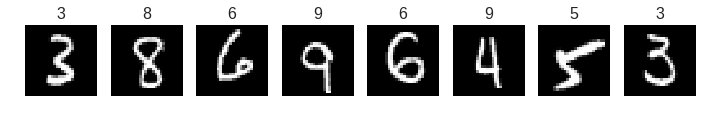

In [0]:
plots(x_imgs[:8],titles=preds[:8])

# Defining Logistic Regression Ourselves

In [0]:
def get_weights(*dims): return nn.Parameter(torch.randn(dims)/dims[0])
def softmax(x): return torch.exp(x)/(torch.exp(x).sum(dim=1)[:,None])

class LogReg(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1_w = get_weights(28*28, 10)  # Layer 1 weights
        self.l1_b = get_weights(10)         # Layer 1 bias

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = (x @ self.l1_w) + self.l1_b  # Linear Layer
        x = torch.log(softmax(x)) # Non-linear (LogSoftmax) Layer
        return x

In [0]:
net2 = LogReg().cuda()
opt=optim.Adam(net2.parameters())

In [0]:
fit(net2,md,n_epochs=5,crit=loss,opt=opt,metrics=metrics)

epoch      trn_loss   val_loss   accuracy   
    0      0.317452   0.279278   0.9224    
    1      0.31763    0.277089   0.9195    
    2      0.295163   0.267068   0.9247    
    3      0.293394   0.260741   0.9298    
    4      0.297129   0.270423   0.9265    



[array([0.27042]), 0.9265]

In [0]:
dl=iter(md.trn_dl)

In [0]:
xmb,ymb=next(dl)#mb means mini batch

In [0]:
xmb


-0.4245 -0.4245 -0.4245  ...  -0.4245 -0.4245 -0.4245
-0.4245 -0.4245 -0.4245  ...  -0.4245 -0.4245 -0.4245
-0.4245 -0.4245 -0.4245  ...  -0.4245 -0.4245 -0.4245
          ...             ⋱             ...          
-0.4245 -0.4245 -0.4245  ...  -0.4245 -0.4245 -0.4245
-0.4245 -0.4245 -0.4245  ...  -0.4245 -0.4245 -0.4245
-0.4245 -0.4245 -0.4245  ...  -0.4245 -0.4245 -0.4245
[torch.cuda.FloatTensor of size 64x784 (GPU 0)]

In [0]:
vxmb = Variable(xmb.cuda())
vxmb

Variable containing:
-0.4245 -0.4245 -0.4245  ...  -0.4245 -0.4245 -0.4245
-0.4245 -0.4245 -0.4245  ...  -0.4245 -0.4245 -0.4245
-0.4245 -0.4245 -0.4245  ...  -0.4245 -0.4245 -0.4245
          ...             ⋱             ...          
-0.4245 -0.4245 -0.4245  ...  -0.4245 -0.4245 -0.4245
-0.4245 -0.4245 -0.4245  ...  -0.4245 -0.4245 -0.4245
-0.4245 -0.4245 -0.4245  ...  -0.4245 -0.4245 -0.4245
[torch.cuda.FloatTensor of size 64x784 (GPU 0)]

In [0]:
preds=net2(vxmb).exp()#Remember that we had taken a log, so to remove that and see our probabilities, we tok an exp again

In [0]:
preds

Variable containing:

Columns 0 to 5 
 7.5563e-05  2.3626e-13  4.0365e-06  2.7687e-08  1.0939e-06  1.2704e-05
 5.5680e-09  2.1180e-01  6.7158e-01  2.3046e-03  2.5504e-03  4.1200e-03
 4.6003e-06  1.7838e-07  5.6111e-06  2.7333e-04  1.2622e-01  2.0319e-03
 7.0588e-08  5.4043e-04  8.7489e-04  2.7414e-03  9.4494e-01  4.0422e-04
 9.9982e-01  4.6648e-15  1.7048e-06  8.7137e-09  4.1175e-12  1.7325e-04
 9.9993e-01  1.9544e-14  2.3474e-06  1.6888e-07  4.0593e-14  6.2783e-05
 1.8363e-05  2.2421e-01  4.1218e-02  3.8114e-01  1.8303e-07  2.8269e-02
 5.0622e-07  1.8226e-11  1.4716e-08  8.5246e-07  2.8607e-07  2.2835e-06
 7.9466e-07  4.5757e-05  1.7742e-05  6.4550e-03  1.9251e-03  9.6650e-04
 4.5957e-07  2.5034e-11  7.2846e-07  5.8336e-06  4.6142e-09  9.9940e-01
 8.0165e-06  4.6112e-09  5.8679e-05  3.0873e-03  9.5700e-01  6.4108e-04
 3.1404e-08  1.4084e-05  2.8198e-03  4.5693e-03  1.4516e-01  8.4935e-05
 2.4429e-07  4.1655e-06  2.0875e-02  3.8927e-03  9.5243e-01  3.5189e-06
 9.7817e-01  1.4585e-09  3

In [0]:
preds=preds.data.max(1)[1];preds


 8
 2
 9
 4
 0
 0
 3
 7
 9
 5
 4
 9
 4
 0
 8
 4
 2
 0
 5
 6
 2
 1
 3
 1
 1
 5
 8
 1
 9
 1
 1
 0
 1
 1
 2
 2
 3
 3
 0
 8
 2
 1
 9
 9
 3
 6
 5
 6
 3
 1
 0
 2
 2
 3
 2
 6
 8
 2
 4
 9
 3
 4
 2
 5
[torch.cuda.LongTensor of size 64 (GPU 0)]

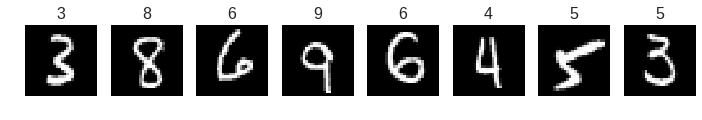

In [0]:
preds=predict(net2,md.val_dl).argmax(1)
plots(x_imgs[:8],titles=preds[:8])

In [0]:
np.mean(preds==y_valid)

0.9265

#Training Loop Implementation


In [0]:
# Our code from above
class LogReg(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1_w = get_weights(28*28, 10)  # Layer 1 weights
        self.l1_b = get_weights(10)         # Layer 1 bias

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = x @ self.l1_w + self.l1_b 
        return torch.log(softmax(x))

net2 = LogReg().cuda()
opt=optim.Adam(net2.parameters())

fit(net2, md, n_epochs=5, crit=loss, opt=opt, metrics=metrics)

epoch      trn_loss   val_loss   accuracy   
    0      0.297836   0.293444   0.916     
    1      0.301471   0.276084   0.9235    
    2      0.281124   0.268978   0.9241    
    3      0.281871   0.264549   0.9283    
    4      0.291832   0.261849   0.9287    



[array([0.26185]), 0.9287]

In [0]:
net2=LogReg().cuda()
loss=nn.NLLLoss()
learning_rate=1e-3
optimizer=optim.Adam(net2.parameters(),lr=learning_rate)

In [0]:
dl=iter(md.trn_dl)

In [0]:
xt,yt=next(dl)
y_pred=net2(Variable(xt).cuda())

In [0]:
l=loss(y_pred,Variable(yt).cuda())
print(l)

Variable containing:
 2.3207
[torch.cuda.FloatTensor of size 1 (GPU 0)]



In [0]:
np.mean(to_np(y_pred).argmax(axis=1)==to_np(yt))

0.046875

In [0]:
??md.trn_dl

In [0]:
optimizer.zero_grad()
l.backward()
optimizer.step()

In [0]:
xt,yt=next(dl)
y_pred=net2(Variable(xt).cuda())

In [0]:
l=loss(y_pred,Variable(yt).cuda())
print(l)

Variable containing:
 2.2205
[torch.cuda.FloatTensor of size 1 (GPU 0)]



In [0]:
np.mean(to_np(y_pred).argmax(axis=1)==to_np(yt))

0.375

In [0]:
for t in range(100):
  xt,yt=next(dl)
  y_pred=net2(Variable(xt).cuda())
  l=loss(y_pred,Variable(yt).cuda())
  
  #next following code is just to print the accuracy after every 10 iterations
  if t%10==0:
    accuracy=np.mean(to_np(y_pred).argmax(axis=1)==to_np(yt))
    print("loss: ",l.data[0],"\t accuracy: ",accuracy)
    
  optimizer.zero_grad()
  l.backward()
  optimizer.step()

loss:  2.2093026638031006 	 accuracy:  0.453125
loss:  1.3223333358764648 	 accuracy:  0.71875
loss:  0.9556372761726379 	 accuracy:  0.765625
loss:  0.7479146122932434 	 accuracy:  0.796875
loss:  0.5509807467460632 	 accuracy:  0.890625
loss:  0.7918213605880737 	 accuracy:  0.796875
loss:  0.4594549238681793 	 accuracy:  0.921875
loss:  0.45505112409591675 	 accuracy:  0.875
loss:  0.3982275724411011 	 accuracy:  0.90625
loss:  0.29289236664772034 	 accuracy:  0.953125


In [0]:
def score(x,y):
  y_pred=to_np(net2(Variable(x).cuda()))
  return np.sum(y_pred.argmax(axis=1)==to_np(y))/len(y_pred)

In [0]:
net2 = LogReg().cuda()
loss=nn.NLLLoss()
learning_rate = 1e-2
optimizer=optim.SGD(net2.parameters(), lr=learning_rate)

for epoch in range(10):
    learning_rate=learning_rate/3
    losses=[]
    dl = iter(md.trn_dl)
    for t in range(len(md.trn_dl)):
        # Forward pass: compute predicted y and loss by passing x to the model.
        xt, yt = next(dl)
        y_pred = net2(V(xt))
        l = loss(y_pred, V(yt))
        losses.append(l)

        # Before the backward pass, use the optimizer object to zero all of the
        # gradients for the variables it will update (which are the learnable weights of the model)
        optimizer.zero_grad()

        # Backward pass: compute gradient of the loss with respect to model parameters
        l.backward()

        # Calling the step function on an Optimizer makes an update to its parameters
        optimizer.step()
    
    val_dl = iter(md.val_dl)
    val_scores = [score(*next(val_dl)) for i in range(len(md.val_dl))]
    print(np.mean(val_scores))

0.9096337579617835
0.9159036624203821
0.9186902866242038
0.9200835987261147
0.9202826433121019
0.9213773885350318
0.9215764331210191
0.9240644904458599
0.9223726114649682
0.9240644904458599


In [0]:
net2 = LogReg().cuda()
loss_fn=nn.NLLLoss()
lr = 1e-2
w,b = net2.l1_w,net2.l1_b

for epoch in range(5):
    losses=[]
    dl = iter(md.trn_dl)
    for t in range(len(md.trn_dl)):
        xt, yt = next(dl)
        y_pred = net2(V(xt))
        l = loss(y_pred, Variable(yt).cuda())
        losses.append(loss)

        # Backward pass: compute gradient of the loss with respect to model parameters
        l.backward()
        w.data -= w.grad.data * lr
        b.data -= b.grad.data * lr
        
        w.grad.data.zero_()
        b.grad.data.zero_()   

    val_dl = iter(md.val_dl)
    val_scores = [score(*next(val_dl)) for i in range(len(md.val_dl))]
    print(np.mean(val_scores))

0.9107285031847133
0.9153065286624203
0.9171974522292994
0.9189888535031847
0.9211783439490446
